Jesse Cook
1/17/19
Phsx 218

# Plotting Code

To do equations, surround it in \$.

$\frac{a}{b}$ = \frac{a}{b}

$\sqrt{a}$ = \sqrt{a}

$\alpha \beta$ = \alpha \beta

$\alpha = \frac{\Delta L}{L \Delta T}$

In [3]:
#functions and imports
import numpy as np
import matplotlib.pyplot as plt

def rule3(dA,dB,dC=0.0,dD=0.0,dE=0.0,dF=0.0,dG=0.0,dH=0.0,dI=0.0):
    return np.sqrt(dA**2+dB**2+dC**2+dD**2+dE**2+dF**2+dG**2+dH**2+dI**2)

def rule4(value,A,dA,B,dB,C=1.0,dC=0.0,D=1.0,dD=0.0,E=1.0,dE=0.0,F=1.0,dF=0.0,G=1.0,dG=0.0,H=1.0,dH=0.0,I=1.0,dI=0.0):
    return value*np.sqrt((dA/A)**2+(dB/B)**2+(dC/C)**2+(dD/D)**2+(dE/E)**2+(dF/F)**2+(dG/G)**2+(dH/H)**2+(dI/I)**2)

###Part 1###

R=504800
C=42.8*(10**-6)
T=R*C

dR=25240
dC=0.1*(10**-6)

V0=12.20
Vtc=0.632*V0
Vtd=0.368*V0

dT=rule4(T,R,dR,C,dC)

tc=np.array([23.68,23.84,23.84])
td=np.array([22.50,21.69,21.25])

dt=rule3(0.22,0.22)

Tc=np.average(tc)
Td=np.average(td)
Ta=(Td+Tc)/2.0
print("T Theor: "+str(T)+" +/- "+str(dT))
print("T Calc : "+str(Ta)+" +/- "+str(dt))

T Theor: 21.60544 +/- 0.05048
T Calc : 22.8 +/- 0.311126983722


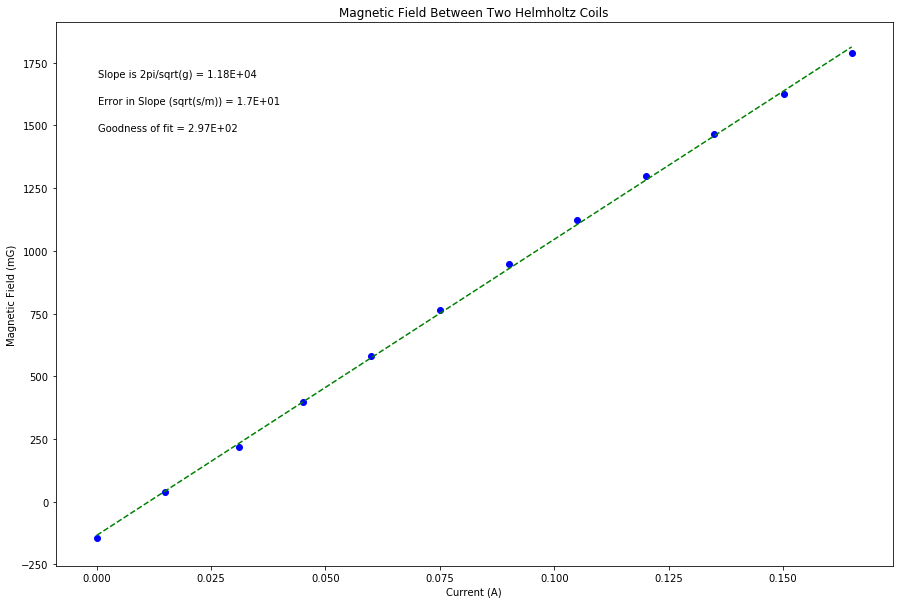

Theoretical Slope = 216380.0(mG/A)


In [21]:
##Magnetic Fields##

#functions and imports
import numpy as np
import matplotlib.pyplot as plt

def rule3(dA,dB,dC=0.0,dD=0.0,dE=0.0,dF=0.0,dG=0.0,dH=0.0,dI=0.0):
    return np.sqrt(dA**2+dB**2+dC**2+dD**2+dE**2+dF**2+dG**2+dH**2+dI**2)

def rule4(value,A,dA,B,dB,C=1.0,dC=0.0,D=1.0,dD=0.0,E=1.0,dE=0.0,F=1.0,dF=0.0,G=1.0,dG=0.0,H=1.0,dH=0.0,I=1.0,dI=0.0):
    return value*np.sqrt((dA/A)**2+(dB/B)**2+(dC/C)**2+(dD/D)**2+(dE/E)**2+(dF/F)**2+(dG/G)**2+(dH/H)**2+(dI/I)**2)

I=np.array([0.0,0.0150,0.031,0.045,0.06,0.075,0.09,0.105,0.12,0.135,0.1501,0.165])#A
B=np.array([-145,37.5,220,396,580,764,946,1123,1298,1465,1625,1787])#mG

tSlope=0.021638*(10**7)#mG/A

dB=np.array([3,3,3,3,3,3,3,2,3,3,3,3])

#Plotting Code
x = I
y = B
dy = dB
#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Current (A)')
plt.ylabel('Magnetic Field (mG)')
plt.title('Magnetic Field Between Two Helmholtz Coils')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope is 2pi/sqrt(g) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (sqrt(s/m)) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()

###

print("Theoretical Slope = "+str(tSlope)+"(mG/A)")



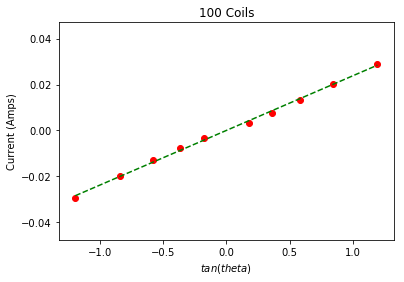

Slope =  0.0238807668171   Amps
Error in slope =  4.36746714607e-05   Amps
Goodness of fit =  698.969855439


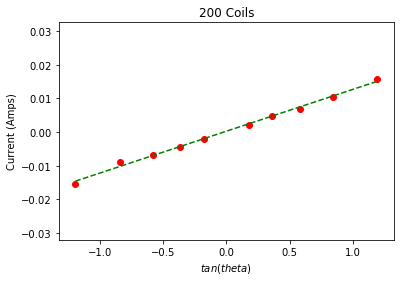

Slope =  0.0124725122489   Amps
Error in slope =  4.36746714607e-05   Amps
Goodness of fit =  347.776937293


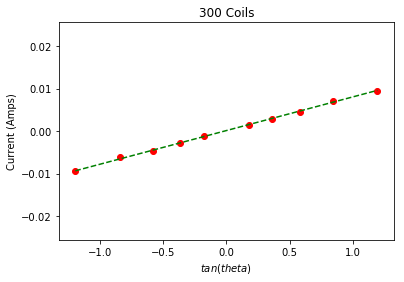

Slope =  0.00795457478573   Amps
Error in slope =  4.36746714607e-05   Amps
Goodness of fit =  31.3717442453
 
B_Earth from 100 coils = 1.39578868083e-05 +/- 1.29865898575e-06(T)
B_Earth from 200 coils = 1.45799266429e-05 +/- 1.35723282125e-06(T)
B_Earth from 300 coils = 1.39479257912e-05 +/- 1.29973953014e-06(T)
Accepted B_Earth       = 1.8428E-05


In [38]:
##EARTHS MAGNETIC FIELD##
import numpy as np
import physplot as phys
from __future__ import division

def rule3(dA,dB,dC=0.0,dD=0.0,dE=0.0,dF=0.0,dG=0.0,dH=0.0,dI=0.0):
    return np.sqrt(dA**2+dB**2+dC**2+dD**2+dE**2+dF**2+dG**2+dH**2+dI**2)

def rule4(value,A,dA,B,dB,C=1.0,dC=0.0,D=1.0,dD=0.0,E=1.0,dE=0.0,F=1.0,dF=0.0,G=1.0,dG=0.0,H=1.0,dH=0.0,I=1.0,dI=0.0):
    return value*np.sqrt((dA/A)**2+(dB/B)**2+(dC/C)**2+(dD/D)**2+(dE/E)**2+(dF/F)**2+(dG/G)**2+(dH/H)**2+(dI/I)**2)

def toRadians(angle):
    return (np.pi*angle)/180.0

M=4*np.pi*(10**-7)

r= 0.215/2.0

N1=100.

N2=200.

N3=300.

T1=np.array([-50,-40,-30,-20,-10,10,20,30,40,50])
T2=np.array([-50,-40,-30,-20,-10,10,20,30,40,50])
T3=np.array([-50,-40,-30,-20,-10,10,20,30,40,50])

I1=np.array([-0.0296,-0.0200,-0.0127,-0.0076,-0.0035,0.0033,0.0076,0.0131,0.0202,0.0290])
I2=np.array([-0.0153,-0.0089,-0.0068,-0.0045,-0.0020,0.0020,0.0049,0.0070,0.0103,0.0159])
I3=np.array([-0.0095,-0.0062,-0.0046,-0.0029,-0.0012,0.0015,0.0029,0.0046,0.0071,0.0095])

dr=0.01

dT1=np.array([0.5,1,2,2,1,1,2,1,0.5,1])
dT2=np.array([2,0.5,2,1.5,2,2,0.5,0.1,0.5,1])
dT3=np.array([1,0.5,2,2,1,0.5,1,0.5,1,1])

dI1=np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])
dI2=np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])
dI3=np.array([0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001])

x1 = np.tan(toRadians(T1))
y1 = I1
dy1 = dI1

x2 = np.tan(toRadians(T2))
y2 = I2
dy2 = dI2

x3 = np.tan(toRadians(T3))
y3 = I3
dy3 = dI3

#plotfit takes in parameters in this order
#phys.plotfit(x,y,dy,title,'xlabel(units)','ylabel(units)','slope units')  Slope units will not render in LaTeX

phys.plotfit(x1,y1,dy1,'100 Coils','$tan(theta)$','Current (Amps)','Amps')
dm1 = np.sqrt(1/((sum(1/dy1**2))*(sum(x1**2/dy1**2))-(sum(x1/dy1**2))**2)*sum(1/dy1**2))

phys.plotfit(x2,y2,dy2,'200 Coils','$tan(theta)$','Current (Amps)','Amps')
dm2 = np.sqrt(1/((sum(1/dy2**2))*(sum(x2**2/dy2**2))-(sum(x2/dy2**2))**2)*sum(1/dy2**2))

phys.plotfit(x3,y3,dy3,'300 Coils','$tan(theta)$','Current (Amps)','Amps')
dm3 = np.sqrt(1/((sum(1/dy3**2))*(sum(x3**2/dy3**2))-(sum(x3/dy3**2))**2)*sum(1/dy3**2))

m1=np.polynomial.polynomial.polyfit(x1,y1,1,w=dy1)[1]
m2=np.polynomial.polynomial.polyfit(x2,y2,1,w=dy2)[1]
m3=np.polynomial.polynomial.polyfit(x3,y3,1,w=dy3)[1]

dB1=rule4((((M*N1)/(2.0*r))*m1),r,dr,m1,dm1)
dB2=rule4((((M*N2)/(2.0*r))*m2),r,dr,m2,dm2)
dB3=rule4((((M*N3)/(2.0*r))*m3),r,dr,m3,dm3)

print(" ")

print("B_Earth from 100 coils = " +str(((M*N1)/(2.0*r))*m1)+ " +/- "+str(dB1) +'(T)')
print("B_Earth from 200 coils = " +str(((M*N2)/(2.0*r))*m2)+ " +/- "+str(dB2) +'(T)')
print("B_Earth from 300 coils = " +str(((M*N3)/(2.0*r))*m3)+ " +/- "+str(dB3) +'(T)')

print("Accepted B_Earth       = 1.8428E-05")